#Wekk 10 - Model Evaluation

##1. Import Library

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Train Data : (455, 30), (455,)
Test Data : (114, 30), (114,)


#2. load dataset

In [15]:
#load datasaet
breast_cancer = load_breast_cancer()
breast_cancer

#independent & dependent variables
X = breast_cancer.data
y = breast_cancer.target

#splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=24)

print(f'Train Data : {X_train.shape}, {y_train.shape}')
print(f'Test Data : {X_test.shape}, {y_test.shape}')


Train Data : (455, 30), (455,)
Test Data : (114, 30), (114,)


In [17]:
#create binary classifier with RFC
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train,y_train)

#predict
predictions = classifier.predict(X_test)

In [21]:
import pandas as pd
import numpy as np

df_breast_cancer = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


[[39  2]
 [ 4 69]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


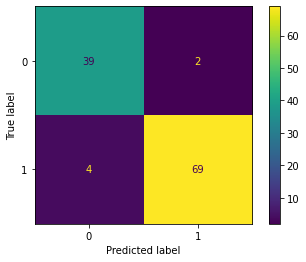

In [24]:
#import lib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# conf matrix
print(confusion_matrix(y_test,predictions))

# visualize conf matrix
plot_confusion_matrix(classifier,X_test,y_test)
plt.show()

In [26]:
#accuracy with lib
from sklearn.metrics import accuracy_score

print(f'Accuracy of the classifier is: {accuracy_score(y_test,predictions)}')

Accuracy of the classifier is: 0.9473684210526315


In [29]:
#accuracy manual

TP = 69
TN = 39
FP = 2
FN = 4

accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Accuracy of the classifier is: {accuracy}')

Accuracy of the classifier is: 0.9473684210526315


In [30]:
#preccision with lib
from sklearn.metrics import precision_score

#calculating precision
print(f'Precisio score of the classifier is {precision_score(y_test,predictions)}')

Precisio score of the classifier is 0.971830985915493


In [31]:
#precision manual

precision = (TP)/(TP+FP)
print(f'precision of the classifier is: {precision}')

precision of the classifier is: 0.971830985915493


In [ ]:
#recall with lib
from sklearn.metrics import recall_score

print(f'recall score is: {recall_score(y_test,predictions)}')

recall score is: 0.9452054794520548


In [ ]:
#recall manual
recall = (TP)/(TP+FN)
print(f'recall of the classifier is: {recall}')

recall of the classifier is: 0.9452054794520548


In [37]:
#specificity with lib
from imblearn.metrics import specificity_score

print(f'specificity score is: {specificity_score(y_test,predictions)}')

specificity score is: 0.9512195121951219


In [38]:
#specificity manual
specificity = (TN)/(TN+FP)
print(f'specificity of the classifier is: {specificity}')

specificity of the classifier is: 0.9512195121951219


In [39]:
#f1 score

from sklearn.metrics import f1_score

print(f'f1 score is: {f1_score(y_test,predictions)}')

f1 score is: 0.9583333333333334


In [41]:
#f1 manual

f1 = (2*precision*recall)/(precision+recall)
print(f'f1 of the classifier is: {f1}')

f1 of the classifier is: 0.9583333333333334


#clasification report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions,zero_division=1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



#roc

AUC for our classifier is: 0.9769462078182426


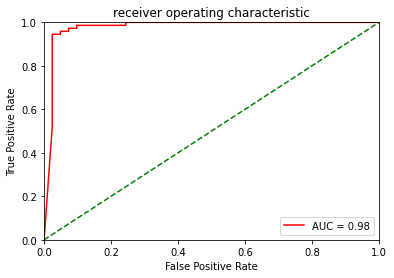

In [50]:
#receiver operatin

from sklearn.metrics import roc_curve, auc

class_prob = classifier.predict_proba(X_test)
preds = class_prob[:,1]

fpr,tpr,treshold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

#print auc
print(f'AUC for our classifier is: {roc_auc}')

#plotting roc
plt.title('receiver operating characteristic')
plt.plot(fpr,tpr,'r',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'g--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()